* Import google drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


* Import movies  folder from my drive

In [ ]:

import os
os.chdir("/gdrive/My Drive/movies")

* install NTLK library

In [ ]:
!pip install nltk

In [ ]:

import pandas as pd 
import numpy as np

reviews=pd.read_csv("IMDB Dataset.csv")

# import re
* re ( Regular expressions) is sequence of character that forms a search pattern which can be used to chekc over text.
* They can be assist an filtering data

# import nltk
* nltk ( Natural Language Toolkit) is a powerful Python package that provides a set of diverse natural languages algorithms. 
* nltk is a leading platform for building Python programs to work with human language data.


# Stopwords
* In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [ ]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')
print(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

# PorterStemmer
* Stemming is a process of cutting the last alphabetg letters of a word and achives the root word.

In [ ]:

from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 50000):
    review = re.sub('[^a-zA-Z]', ' ', reviews['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus.append(review)

# Word Cloud
* Wordcloud is the pictorial representation of the most frequently repeated words representing the size of the word.
* Many times we  might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.
# corpus
* Corpora is a group presenting multiple collections of text documents.
* A single collection is called corpus.

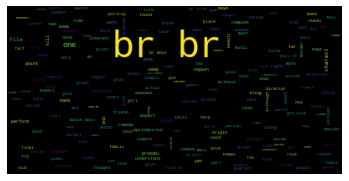

In [ ]:

corp_str = str(corpus)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* To customize the stopwords 

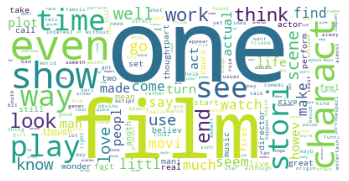

In [ ]:
from wordcloud import STOPWORDS
mystopwrds = set(STOPWORDS)
mystopwrds.add("br")
wc = WordCloud(stopwords=mystopwrds,relative_scaling=1.0,background_color="white")
wordcloud = wc.generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# COUNTVECTORIZOR 
*  It is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.
* Creating the Bag of Words model

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 100)
X = cv.fit_transform(corpus).toarray()
y = reviews.iloc[:, 1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2020)


# Gaussian Naives Bayes

* Describe that probability of an event based on prior knowledge of conditions be related of conditions to the event.



In [ ]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.69      0.77      0.73      4993
    positive       0.74      0.66      0.69      5007

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

0.7117


# TF-IDF VECTORIZER (Term Frequency Inverse Document Frequency)
* This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. 
* TF-IDF is word frequency score that try to highlight words that are more interesting.

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 100)
X = cv.fit_transform(corpus).toarray()
y =reviews.iloc[:, 1]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2020)


# Gaussian Naives Bayes

In [ ]:


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.72      0.74      0.73      4993
    positive       0.73      0.71      0.72      5007

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

0.7248


# RANDOM FOREST USING PORTERSTEMMER 
* Replacing Apostrophe to Word

In [ ]:

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase



# import PorterStemmer

In [ ]:


from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 50000):
    review = reviews['review'][i]
    review = decontracted(review)    
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
#    ps = PorterStemmer()
    review = review.split()
#    review = [word for word in review if not word in set(stops)]
    #review = ' '.join(review)
    #review = [review]
    corpus.append(review)




# import  Word2Vec
* word2vector using gensim
 * It is algorithm that takes corpora as a input and output it in the form of vectors.
 * Word2Vec finds relation (Semantic or Syntactic) between the words which was not possible by our Tradional TF-IDF or Frequency based approach.
* Gensim is fairly easy to use module which inherits CBOW and Skip-gram.
 * Continuous Bag of Words (CBOW) in  neighboring words are provided as Input to predict the Target. In other words, A context is Provided as input to predict the Target.
 * Skip-gram is opposite / inverse of CBOW, wherein a target word is provided as output in order to predict the Contextual / Neighboring words.


In [ ]:
from gensim.models import  Word2Vec

* sg = 0 for CBOW  
* sg = 1 for skip-gram

In [ ]:

 

model_r =  Word2Vec(corpus, min_count=1,sg=0)


# Using pandas 

In [ ]:

means = pd.DataFrame()
for i in corpus :
    row_means = np.mean(model_r[i],axis=0)
    row_means = pd.Series(row_means)
    means = pd.concat([means, row_means],axis=1)
    

X = means.T
y = reviews.iloc[:, 1]



from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2020,
                                                    stratify=y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=2020,
                                  n_estimators=10,oob_score=True)
model_rf.fit( X , y )


y_pred = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[[7482   18]
 [  78 7422]]
              precision    recall  f1-score   support

    negative       0.99      1.00      0.99      7500
    positive       1.00      0.99      0.99      7500

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

0.9936


 * ROC_CURVE,ROC_AUC_SCORE

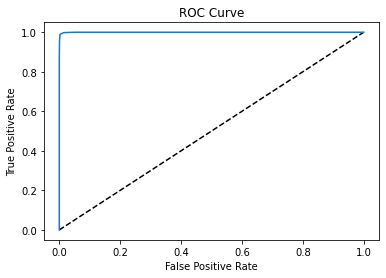

Word2Vec(vocab=100351, size=100, alpha=0.025)


In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
y_test = pd.get_dummies(y_test, drop_first=True)
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)


# summarize the loaded model
print(model_r)

# summarize vocabulary
words = list(model_r.wv.vocab)


* Multiple  ROC_CURVE in one plot

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers=[RandomForestClassifier(random_state=2020),GaussianNB(),KNeighborsClassifier(),
            DecisionTreeClassifier(random_state=2020)]

* Define a result table as a DataFrame

* Train the models and record the results
* Set name of the classifiers as index labels

In [ ]:

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]

    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


result_table.set_index('classifiers', inplace=True)

* Plot the figure

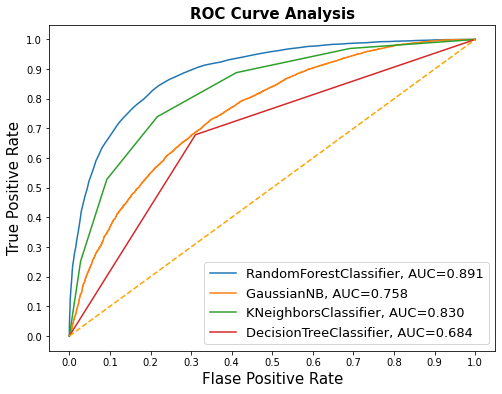

In [ ]:

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

* From above graph here we found Randomforest is the best model